In [216]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/int303-big-data-analysis-2223-S1/sample_submission.csv
/kaggle/input/int303-big-data-analysis-2223-S1/train.csv
/kaggle/input/int303-big-data-analysis-2223-S1/test.csv


## Import data

In [217]:
train = pd.read_csv('/kaggle/input/int303-big-data-analysis-2223-S1/train.csv')
test = pd.read_csv('/kaggle/input/int303-big-data-analysis-2223-S1/test.csv')
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,32,No,Travel_Frequently,116,Research & Development,13,3,Other,1,881,...,3,80,1,2,2,3,2,2,2,2
1,53,No,Travel_Rarely,1436,Sales,6,2,Marketing,1,153,...,4,80,1,13,3,1,7,7,4,5
2,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,1467,...,1,80,1,9,5,3,7,7,1,7
3,34,No,Travel_Rarely,971,Sales,1,3,Technical Degree,1,1085,...,4,80,0,10,3,3,10,9,8,6
4,50,No,Travel_Frequently,333,Research & Development,22,5,Medical,1,1087,...,4,80,0,32,2,3,32,6,13,9


## Check the data properties

In [218]:
train.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [219]:
train.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.0,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,...,1103.000000,1103.0,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,36.697189,810.515866,9.296464,2.943790,1.0,742.293744,2.731641,65.805984,2.733454,2.075249,...,2.696283,80.0,0.764279,11.212149,2.792384,2.773345,7.004533,4.223935,2.143246,4.150499
std,9.075448,405.943336,8.150026,1.012855,0.0,426.965196,1.081341,20.186842,0.710075,1.117731,...,1.073207,0.0,0.830844,7.806784,1.308029,0.702172,6.124760,3.608279,3.203527,3.579410
min,18.000000,103.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,467.500000,2.000000,2.000000,1.0,369.500000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,805.000000,7.000000,3.000000,1.0,740.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1169.000000,14.000000,4.000000,1.0,1116.500000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,1470.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [220]:
train.isnull().sum() # check for missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [221]:
train.describe(include='object').T # check for categorical variables

,count,unique,top,freq
Attrition,1103,2,No,931
BusinessTravel,1103,3,Travel_Rarely,788
Department,1103,3,Research & Development,716
EducationField,1103,6,Life Sciences,466
Gender,1103,2,Male,675
JobRole,1103,9,Sales Executive,252
MaritalStatus,1103,3,Married,499
Over18,1103,1,Y,1103
OverTime,1103,2,No,802


In [222]:
for columns in train.columns:
    print(columns,train[columns].nunique()) # check for unique values

Age 43
Attrition 2
BusinessTravel 3
DailyRate 750
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1103
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1043
MonthlyRate 1076
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 36
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


## Exploratory Data Analysis 

### Distribution of Attrition

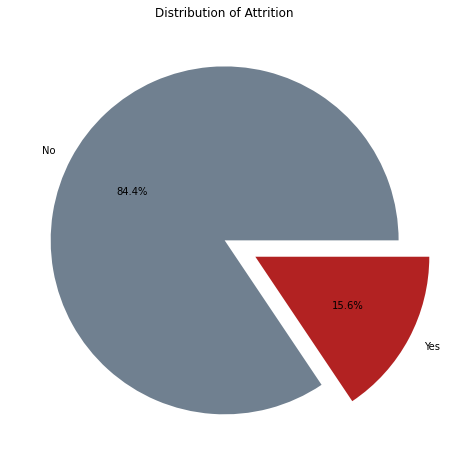

In [223]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (15,8))
plt.pie(train['Attrition'].value_counts(),labels=['No','Yes'],
        explode=(0,0.2), autopct='%1.1f%%',colors = ['slategrey','firebrick'])
plt.title('Distribution of Attrition')
plt.show()

### Gender distribution for attrition

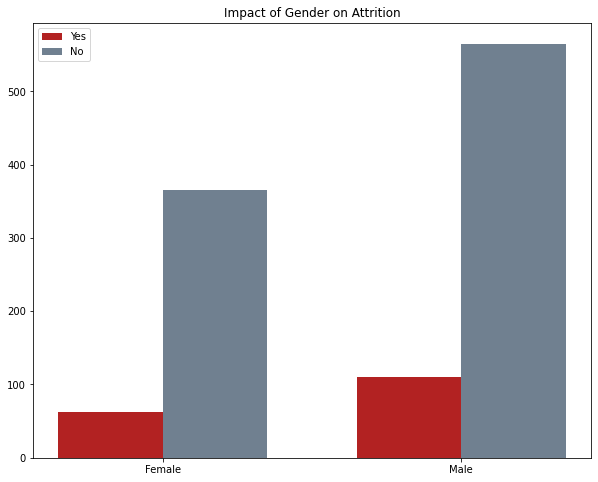

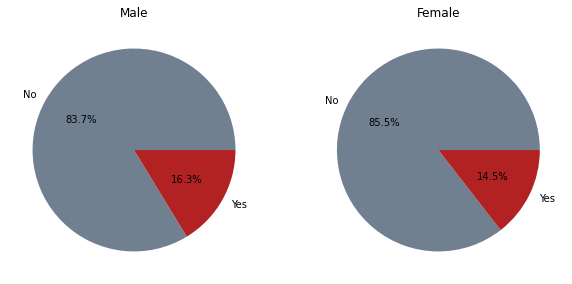

In [224]:
male_attrition = train[train['Gender'] == 'Male']['Attrition'].value_counts()
female_attrition = train[train['Gender'] == 'Female']['Attrition'].value_counts()
yes_attrition = train[train['Attrition'] == 'Yes']['Gender'].value_counts().sort_index()
no_attrition = train[train['Attrition'] == 'No']['Gender'].value_counts().sort_index()
x = np.arange(2)
width = 0.35
tick_label = sorted(train['Gender'].unique())
fig,ax = plt.subplots(figsize = (10,8))
ax.bar(x-width/2,yes_attrition,width,label='Yes',color = 'firebrick')
ax.bar(x+width/2,no_attrition,width,label='No',color = 'slategrey')
ax.set_xticks(x)
ax.set_xticklabels(tick_label)
ax.set_title('Impact of Gender on Attrition')
ax.legend()
# ax.bar(train['Gender'].value_counts().index,train['Gender'].value_counts())
colors = ['slategrey','firebrick']
f, (ax1,ax2) = plt.subplots(1,2,figsize=(10,8))
ax1.pie(male_attrition,labels=['No','Yes'], autopct='%1.1f%%',colors =colors)
ax1.set_title('Male')
ax2.pie(female_attrition,labels=['No','Yes'], autopct='%1.1f%%',colors =colors)
ax2.set_title('Female')
plt.show()

### How does travel frequency affect attrition

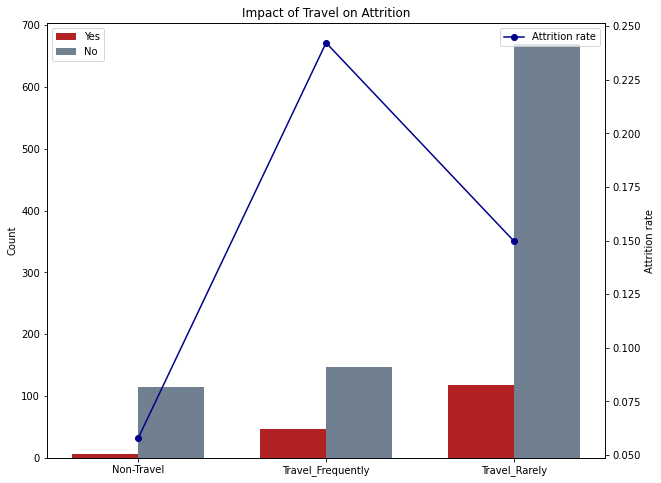

In [225]:
travel_yes_attrition = train[train['Attrition'] == 'Yes']['BusinessTravel'].value_counts().sort_index()
travel_no_attrition = train[train['Attrition'] == 'No']['BusinessTravel'].value_counts().sort_index()
travel_x = np.arange(train['BusinessTravel'].nunique())
travel_width = 0.35
travel_tick_label = sorted(train['BusinessTravel'].unique())
fig,ax = plt.subplots(figsize = (10,8))
ax.bar(travel_x-travel_width/2,travel_yes_attrition,travel_width,label='Yes',color = 'firebrick')
ax.bar(travel_x+travel_width/2,travel_no_attrition,travel_width,label='No',color = 'slategrey')
ax.set_ylabel('Count')
ax2 = ax.twinx()
ax2.plot(travel_x,travel_yes_attrition/(travel_no_attrition+travel_yes_attrition),color = 'darkblue',marker='o')
ax.set_xticks(travel_x)
ax.set_xticklabels(travel_tick_label)
ax.set_title('Impact of Travel on Attrition')
ax2.set_ylabel('Attrition rate')
ax.legend(loc = 'upper left')
ax2.legend(['Attrition rate'],loc='upper right')
plt.show()

The data suggests that the frequency of business travel does not have a strong impact on employee attrition. In fact, employees who travel rarely are more likely to remain with the company. However, those who travel frequently have the highest rate of attrition. Therefore, it is unlikely that business travel is a major factor in employee attrition.

### What's the effect of age on attrition

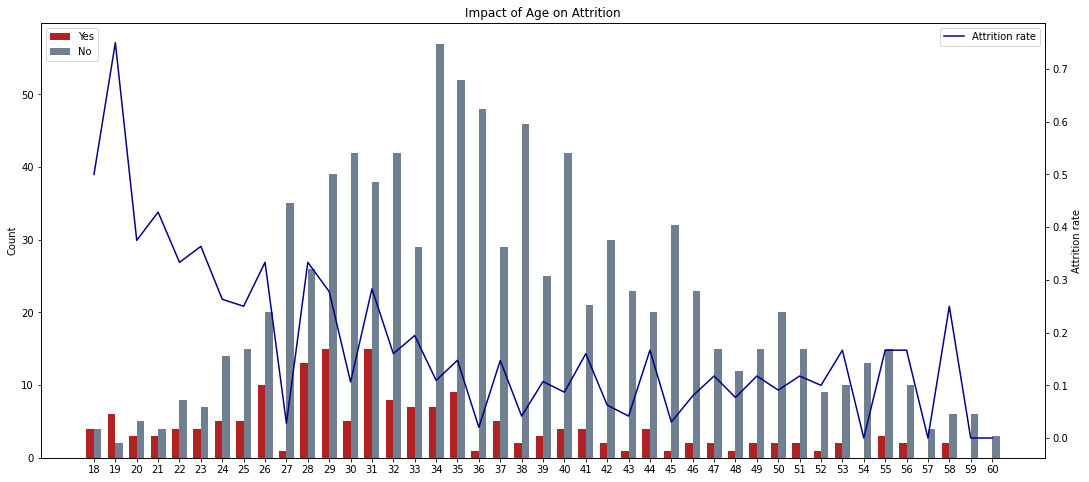

In [226]:
age_x = np.arange(train['Age'].nunique())
age_width = 0.35
age_tick_label = sorted(train['Age'].unique())
age_yes_dic = {}
for i in range(len(age_tick_label)):
    age_yes_dic[age_tick_label[i]] = 0
age_no_dic = age_yes_dic.copy()
age_yes_attrition = train[train['Attrition'] == 'Yes']['Age'].value_counts().sort_index()
age_no_attrition = train[train['Attrition'] == 'No']['Age'].value_counts().sort_index()
for i,v in age_yes_attrition.iteritems():
    age_yes_dic[i] = v
for i,v in age_no_attrition.iteritems():
    age_no_dic[i] = v
age_yes_attrition = list(age_yes_dic.values())
age_no_attrition = list(age_no_dic.values())
fig,ax = plt.subplots(figsize=(18,8))
ax.bar(age_x-age_width/2,age_yes_attrition,age_width,label='Yes',color = 'firebrick')
ax.bar(age_x+age_width/2,age_no_attrition,age_width,label='No',color = 'slategrey')
ax.set_ylabel('Count')
ax2 = ax.twinx()
prob = []
for i in range(len(age_yes_attrition)):
    prob.append(age_yes_attrition[i]/(age_yes_attrition[i]+age_no_attrition[i]))
ax2.plot(age_x,prob,color = 'darkblue',linestyle = 'solid')
ax2.set_ylabel('Attrition rate')
ax.set_xticks(age_x)
ax.set_xticklabels(age_tick_label)
ax.set_title('Impact of Age on Attrition')
ax.legend(loc = 'upper left')
ax2.legend(['Attrition rate'],loc='upper right')
plt.show()

The chart shows that the highest rate of employee turnover or departure from the organization occurs among those in the age range of 28 to 32. This may be because at this stage in their careers, individuals tend to prioritize stability in their job. The rate of attrition decreases with increasing age. In contrast, employees in the age range of 18 to 20 are more likely to leave the organization, possibly because they are still exploring their career options. The rate of employee departure appears to level off at around the age of 23.

### How job satisfaction affect attrition

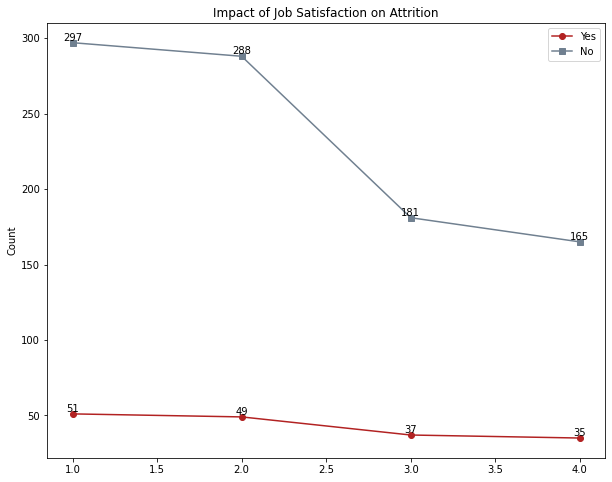

In [227]:
job_yes_attrition = train[train['Attrition'] == 'Yes']['JobSatisfaction'].value_counts()
job_no_attrition = train[train['Attrition'] == 'No']['JobSatisfaction'].value_counts()
job_x =sorted(train['JobSatisfaction'].unique())
plt.figure(figsize=(10,8))
plt.plot(job_x,job_yes_attrition,color='firebrick',label='Yes',marker='o',linestyle='solid')
for a,b in zip(job_x,job_yes_attrition):
    plt.text(a,b+0.1,'%.0f'%b,ha='center',va='bottom',fontsize=10)
plt.plot(job_x,job_no_attrition,color = 'slategrey',label='No',marker='s',linestyle='solid')
for a,b in zip(job_x,job_no_attrition):
    plt.text(a,b+0.1,'%.0f'%b,ha='center',va='bottom',fontsize=10)
# ax.set_xticks(job_x)
# ax.set_xticklabels(job_tick_label)
plt.title('Impact of Job Satisfaction on Attrition')
plt.ylabel('Count')
plt.legend(['Yes','No'])
plt.show()

As job satisfaction increases, attrition rates tend to decrease. This trend is particularly evident in the range of 1-2, where attrition rates are lowest. However, in the range of 2-3, we see an increase in attrition as employees may be more likely to seek out better opportunities. Overall, the data suggests that a high level of job satisfaction can lead to lower levels of employee attrition.

## Data preprocessing and Feature engineering

In [228]:
# Mapping the Attrition column to numerical values
# Drop the meaningless columns
def preprocessing(df):
    df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
    df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)
    return df

In [229]:
train = preprocessing(train)
train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,32,0,Travel_Frequently,116,Research & Development,13,3,Other,3,Female,...,4,3,1,2,2,3,2,2,2,2
1,53,0,Travel_Rarely,1436,Sales,6,2,Marketing,2,Male,...,4,4,1,13,3,1,7,7,4,5
2,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
3,34,0,Travel_Rarely,971,Sales,1,3,Technical Degree,4,Male,...,3,4,0,10,3,3,10,9,8,6
4,50,0,Travel_Frequently,333,Research & Development,22,5,Medical,3,Male,...,3,4,0,32,2,3,32,6,13,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,34,0,Travel_Rarely,511,Sales,3,2,Life Sciences,4,Female,...,3,1,0,6,3,3,2,2,2,2
1099,46,0,Travel_Rarely,1277,Sales,2,3,Life Sciences,3,Male,...,3,2,1,13,5,2,10,6,0,3
1100,32,0,Travel_Rarely,529,Research & Development,2,3,Technical Degree,4,Male,...,3,4,0,4,4,3,4,2,1,2
1101,39,0,Non-Travel,105,Research & Development,9,3,Life Sciences,4,Male,...,3,3,0,21,3,2,6,0,1,3


In [230]:
# One-hot encode the data using pandas get_dummies(to the categorical features with 9 or less unique values)
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
def feature_engineering(df):
    dummy_column = [columns 
                for columns in df.drop('Attrition',axis=1).columns if df[columns].nunique() <= 9 and df[columns].dtype == 'object']
    df_1 = pd.DataFrame(pd.get_dummies(df[dummy_column]))
    # minmaxscaler = MinMaxScaler()
    numerical_column = [columns for columns in df.drop('Attrition',axis=1).columns if df[columns].dtype == 'int64' or df[columns].dtype == 'float64']
    df_2 = pd.DataFrame(df[numerical_column])
    return pd.concat([df_1,df_2,df['Attrition']],axis=1)

In [231]:
train = feature_engineering(train)
train

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,1,0,0,1,0,0,0,0,0,...,3,1,2,2,3,2,2,2,2,0
1,0,0,1,0,0,1,0,0,1,0,...,4,1,13,3,1,7,7,4,5,0
2,0,0,1,0,1,0,0,0,0,1,...,1,1,9,5,3,7,7,1,7,0
3,0,0,1,0,0,1,0,0,0,0,...,4,0,10,3,3,10,9,8,6,0
4,0,1,0,0,1,0,0,0,0,1,...,4,0,32,2,3,32,6,13,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,0,0,1,0,0,1,0,1,0,0,...,1,0,6,3,3,2,2,2,2,0
1099,0,0,1,0,0,1,0,1,0,0,...,2,1,13,5,2,10,6,0,3,0
1100,0,0,1,0,1,0,0,0,0,0,...,4,0,4,4,3,4,2,1,2,0
1101,1,0,0,0,1,0,0,1,0,0,...,3,0,21,3,2,6,0,1,3,0


## Model building

In [232]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV,cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score,mean_squared_error
from sklearn import svm
from sklearn import model_selection
from sklearn.feature_selection import SelectPercentile

X_train_origin = train.drop('Attrition',axis=1)
y_train_origin = train['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X_train_origin, y_train_origin, test_size=0.2, random_state=42) # used for validation

### Train and Validate the model

In [233]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
lr = LogisticRegression(solver='liblinear',penalty='l1')
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('Train Accuracy: ',accuracy_score(y_train,y_train_pred))
print('Test Accuracy: ',accuracy_score(y_test,y_test_pred))

Train Accuracy:  0.8979591836734694
Test Accuracy:  0.8868778280542986


In [234]:
# Random Forest
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)
print('RandomForestClassification Train Accuracy: ',accuracy_score(y_train,rf_train_pred))
print('RandomForestClassification Test Accuracy: ',accuracy_score(y_test,rf_test_pred))

RandomForestClassification Train Accuracy:  1.0
RandomForestClassification Test Accuracy:  0.8642533936651584


In [235]:
# XGBoost
xg = XGBClassifier(n_estimators=500)
xg.fit(X_train,y_train)
xg_train_pred = xg.predict(X_train)
xg_test_pred = xg.predict(X_test)
print('XGBoost Train Accuracy: ',accuracy_score(y_train,xg_train_pred))
print('XGBoost Test Accuracy: ',accuracy_score(y_test,xg_test_pred))

XGBoost Train Accuracy:  1.0
XGBoost Test Accuracy:  0.9004524886877828


### Predict the test data

In [236]:
xg = XGBClassifier(n_estimators=500)
xg.fit(X_train_origin,y_train_origin)
test_result = pd.DataFrame()
test_result['EmployeeNumber'] = test['EmployeeNumber']
test = preprocessing(test)
test = feature_engineering(test)
result = xg.predict(test.drop('Attrition',axis=1))
test_result['Attrition'] = result
test_result['Attrition'] = test_result['Attrition'].map({1:'Yes',0:'No'})
test_result

,EmployeeNumber,Attrition
0,1,No
1,3,No
2,12,No
3,14,No
4,18,Yes
...,...,...
362,1437,Yes
363,1440,No
364,1441,No
365,1459,No


In [237]:
test_result.to_csv('submission.csv',index=False)